In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
Data= pd.read_csv('Transformed_Housing_Data2.csv')

In [ ]:
#predictionwith meanprediction-module5.1
#her we are using T_H_D2 ,we are not using scale data-(its will be used in final model prediction)

In [3]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [4]:
Data.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,...,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,...,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#calculate Average/mean of sale price

In [6]:
Data['mean_sales']=Data['Sale_Price'].mean()
Data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [ ]:
#looks all means are same->this is our first predicition model of means
#but we need to visulazise(matplotlib is used)

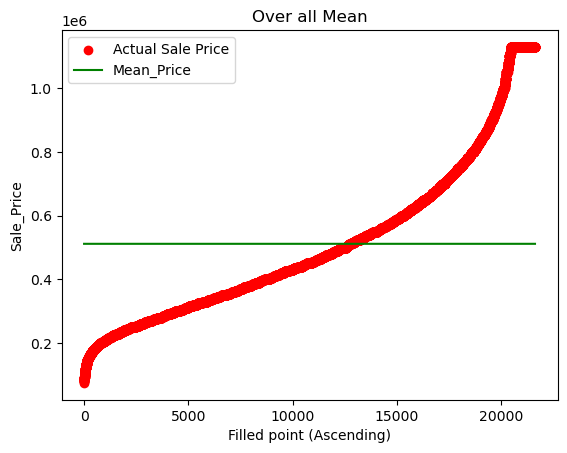

In [9]:
plt.figure(dpi=100)
k=range(0,len(Data))
plt.scatter(k,Data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,Data['mean_sales'].sort_values(),color='green',label='Mean_Price')
plt.xlabel("Filled point (Ascending)")
plt.ylabel("Sale_Price")
plt.title("Over all Mean")
plt.legend()

In [ ]:
#means _sales is almost middle of the plot
#this mean_sales is not good for the house with high/low saleprice
#for better performnace we would calculate mean os saleprice with respect to overall grade of the house

In [11]:
grades_mean=Data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [ ]:
#notice that all saleprice means differ acc to grade and notice the grade2 (1129575) is higher than any other grade,this is due to predsence of high vakue datapoints which are equal to or close to the upper limits
#be free/creative by finding means of sale price with other categorical or combination of them 

In [15]:
#Data['Overall Grade'].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [ ]:
#lets store grade_means in our dataset column as anew column

In [19]:
Data['grade_mean']=0

for i in grades_mean.columns:
    Data['grade_mean'][Data['Overall Grade']==i]=grades_mean[i][0]
Data['grade_mean'].head()    

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [30]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [ ]:
#how does this model compared to overall mean predictiion model we did prevoiusly?lets see visually

In [21]:
gradewise_list = []
for i in range(1,11):
  k = Data["Sale_Price"][Data["Overall Grade"] == i]
  gradewise_list.append(k)

In [23]:
classwise_list = []
for i in range(1,11):
  k = Data["Sale_Price"][Data["Overall Grade"] == i]
  classwise_list.append(k)

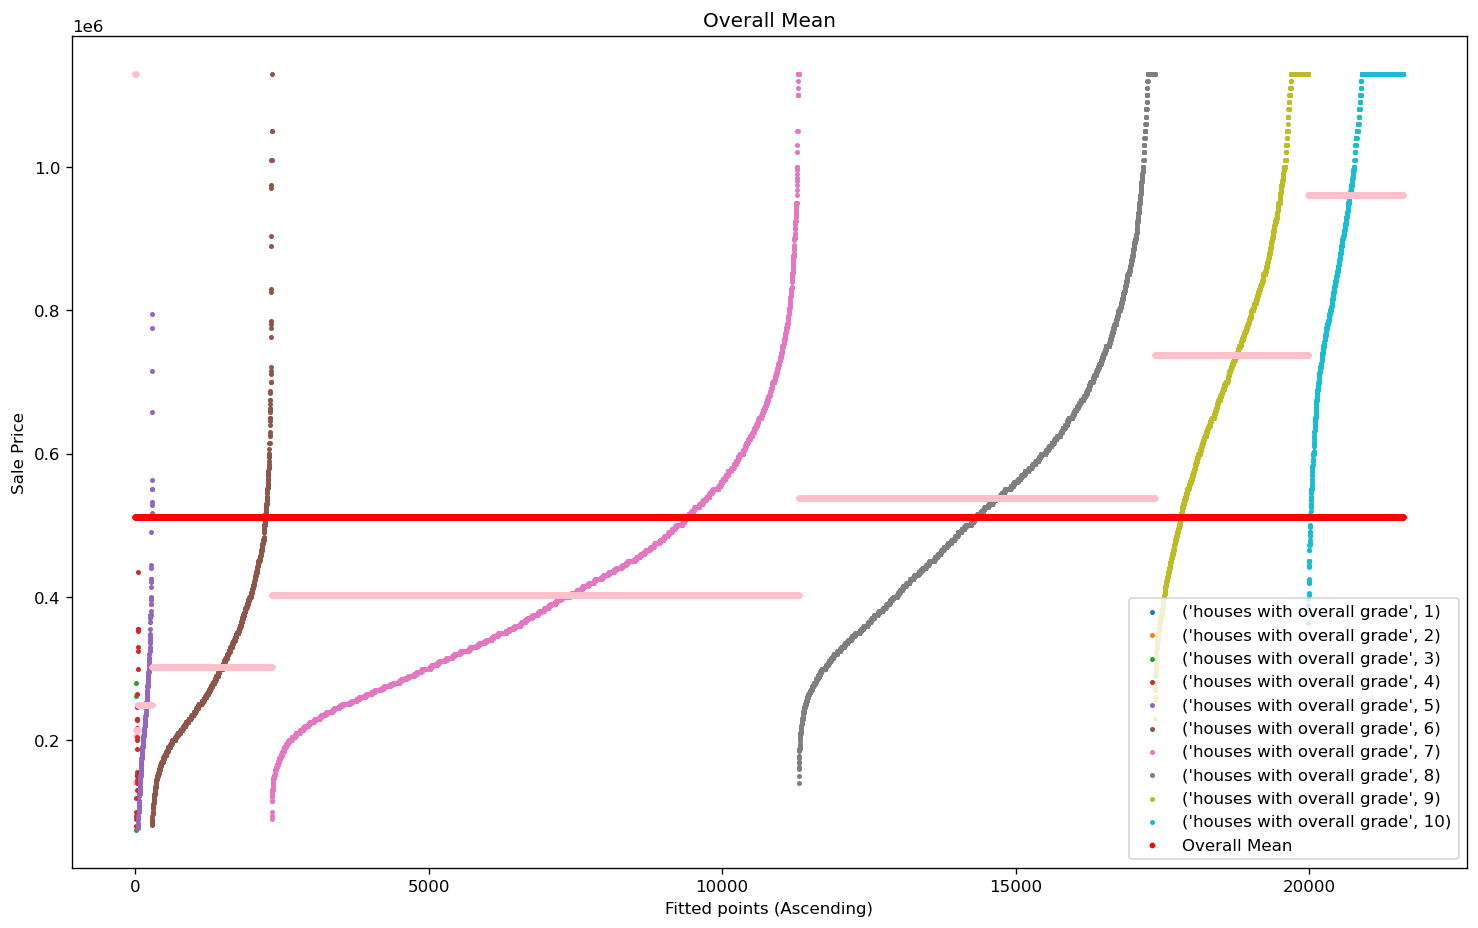

In [27]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         Data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

In [ ]:
#both model prediction WRT to actuals,in second module meansaleprice wrt to overall grade is reprsented by pink line 
#and prediction are closed to actual with compared to first model  represented by red line

In [ ]:
#Residual Plot
#-->residual=prediction -  Actual
#-->scatter plot -->difference between prediction and actual
#lets calulate residual now and observe the result on a scatter plot
#to make residual plot:
#-->1.calucu;ate difference between prediction value  and actual sale price in both the model
#-->2then store the result  in the variable mean difference and grade mean difference

In [28]:
mean_difference=Data['mean_sales']-Data['Sale_Price']
grade_mean_difference=Data['grade_mean']-Data['Sale_Price']


In [ ]:
#plot residual by using matplotlib,x-axis-->residual

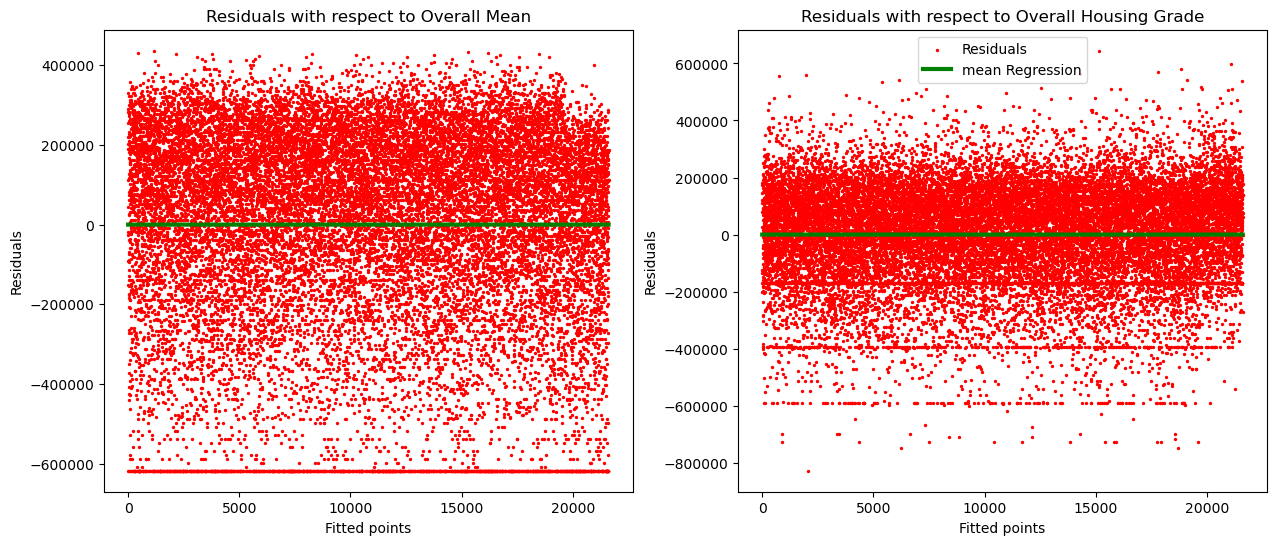

In [29]:
k = range(0, len(Data))
l = [0 for i in range(len(Data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )#s is marker size
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [ ]:
#the zero line represent the residual of a perfect model which would be zero
# see difference between two model
#--?first model is largest spread residual compared with 2nd model(which means 2nd model is closer to the zero line)
#-->this is PERFECT MODEL
#this verify our assumption that mean regression based on categorical feature will give better result
#we learnt how to visualize outcomes of any model and goodness of it prediction.but so far we only visualizse teh model
#is there any mathematicall way that gives us a quantifiable metric using which we can compare it with other model?yes(next tutorial)

In [ ]:
#model evaluation metric-part1
#-->mean absolute error(MAE)
#-->mean square error(MSE)
#datascientist often need quantifiable results in the form of "numbers"
#quantifiable metrics are-->
#-->mean absolute error(MAE)
#-->mean square error(MSE)
#-->root mean square error(RMSE)
#helps to find how good/bad our model prediction are?
#compare one model with other

In [ ]:
#MAE
#when we plot residual value(prediction-actual)
#that residual is alos called as "individual error term"
#to find all error=er1+error2+---/tottal no of data points

In [32]:
#for first model ,call as mean error
#cost=sum(grade_mean_difference)/len(Data)
#print(round(cost,7))

-0.0


In [ ]:
cost=sum(mean_difference)/len(Data)
print(round(cost,7))

In [ ]:
#means our model has zero error.it is perfect,but the model is not perfect and prediction are not the same as actual? why our meandifferenc eis zero?
#we have some positive and negative means-->it cancells each other and get zero
#this will mislead the output
#to correct this we use mean ansolute error

In [ ]:
#to get MAE->take absoulte value of each individual error term,sum it up for all the data points and then take the mean

In [ ]:
#Ycap-->prediction value
#Y -->actual value
#n-->total no of data points
#the residual or individual error terms gives as Ycap-Y
#define all variable to calculate the error

In [34]:
Y = Data["Sale_Price"]
Y_hat1 = Data["mean_sales"]
Y_hat2 = Data['grade_mean']
n = len(Data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [ ]:
#we see all length are same,then we can start calculate error

In [ ]:
#MAR for Model 1

In [35]:
MAE_cost_mean = sum(abs(Y_hat1 - Y))/n
MAE_cost_mean

199168.78146839526

In [ ]:
#note error is not zero

In [ ]:
#MAE for REgression model 2

In [36]:
MAE_cost_grade_mean = sum(abs(Y_hat2 - Y))/n
MAE_cost_grade_mean

137081.70298203363

In [ ]:
#note errror is not zero but lower than model 1 error
#this confirm visulaize  earlier is correct --> model 2 is correct(better than model1)

In [ ]:
#can calculate MAE by sklearn

In [37]:
from sklearn.metrics import mean_absolute_error
MAE_cost_grade_mean = mean_absolute_error(Y_hat2, Y)
MAE_cost_grade_mean

137081.7029820291

In [ ]:
#MAE-->says how far ,on an averge ,the actual point is expected to lie from the prediction points

In [ ]:
#MEAN SQUARE ERROR(MSE)
#the differnece between MAE and MSE is MSE-->square the individaul errors ,sum them up and then take mean of it

In [ ]:
#python MSE by skleran lib

In [39]:
from sklearn.metrics import mean_squared_error
MSE_cost__mean =mean_squared_error (Y_hat1, Y)
MSE_cost_grade_mean = mean_squared_error(Y_hat2, Y)
MSE_cost__mean,MSE_cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [ ]:
#model 1 is larger than model2

In [ ]:
#ROOT MEAN SQUARE ERRRO(RMSE)-->to find the middle ground(distance between actual points WRT to predicted points)
#it nothing but sq.root of MSE
#we dont have sklearn lib for this ,so we use **0,5

In [40]:
from sklearn.metrics import mean_squared_error
RMSE_cost__mean =mean_squared_error (Y_hat1, Y)**0.5
RMSE_cost_grade_mean = mean_squared_error(Y_hat2, Y)**0.5
RMSE_cost__mean,RMSE_cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [ ]:
#note:RMSE  >MAE
#but RMSE is still in the same overakll scale as that of MAE

In [ ]:
#Rsquare-->1-(mse(model)/mse(mean))

In [41]:
Y = Data["Sale_Price"]
Y_bar =Data["mean_sales"]
Y_hat = Data['grade_mean']#predicted from model2
n = len(Data)


#verify all list length
len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [44]:
#Rsquare -->MSE of model(mean model)
mse_mean_model1 = mean_squared_error( Y_bar, Y)
mse_mean_model1


62528116847.799576

In [45]:
#MSE of model2 (regresssion mean)
mse_regression_model2 = mean_squared_error( Y_hat, Y)
mse_regression_model2


30804835720.342426

In [48]:
R2=1-(mse_regression_model2/mse_mean_model1)
R2

0.5073442592981836